# ROHIT MITHBAVKAR

# **Introduction: Predicting Credit Card Defaulters using Machine Learning**

### Credit card default prediction is a critical task in the financial industry, aiming to forecast whether a credit card holder is likely to default on their payment in the next month. Default prediction models play a crucial role in risk assessment and decision-making processes for credit card companies, helping them minimize financial losses and optimize credit risk management strategies.

### In this project, we aim to develop and evaluate machine learning models for predicting credit card defaulters based on a dataset containing various features such as demographic information (e.g., age, sex, education, marriage), credit history (e.g., payment status, bill amounts), and payment behavior (e.g., past payment amounts). The dataset provides insights into the characteristics of credit card users and their payment behaviors over multiple months.

### Our objective is to leverage the power of machine learning algorithms to build predictive models that can accurately classify credit card holders as either defaulters or non-defaulters for the upcoming month. By analyzing historical data and identifying patterns in the behavior of defaulters, we seek to create robust models capable of generalizing to unseen data and making reliable predictions.

### Throughout the project, we will explore various machine learning techniques, including logistic regression, decision trees, random forests, and xg boosting, among others. We will also perform thorough data preprocessing, feature engineering, and hyperparameter tuning to optimize model performance and enhance prediction accuracy.

### Ultimately, the success of our project lies in developing predictive models that not only achieve high accuracy but also provide valuable insights into the factors influencing credit card defaults. These models have the potential to assist credit card companies in mitigating risks, improving customer management strategies, and ultimately enhancing the overall stability and profitability of their business operations.

### **Dataset Information**
* Number of instances: 30000
* Number of attributes: 25
---

### **Feature Information**
### The dataset contains features like:

1. **ID**: Unique identifier for each customer.
2. **LIMIT_BAL**: Credit limit for the customer.
3. **SEX**: Gender of the customer.
4. **EDUCATION**: Level of education.
5. **MARRIAGE**: Marital status.
6. **AGE**: Age of the customer.
7. **PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6**: Payment status for the last six months.
8. **BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**: Amount of bill statement for the last six months.
9. **PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6**: Amount of previous payment for the last six months.

---
### **Target Variable**
1. **default payment next month**: Target variable indicating whether the customer defaults on the credit card payment in the next month (1 = yes, 0 = no).

### **1. Importing Libraries**

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### **2. Loading Data**

In [3]:
df = pd.read_csv(r'C:\Users\Rohit\Downloads\default of credit card clients - Data.csv', header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Shape of dataset

df.shape

(30000, 25)

* **Number of records: 30000**
* **Number of features: 25**

In [6]:
# Let's have a look on data types of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# Let's see the descriptive stats of all the features

df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Lets have a look at the colulms

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
# Dropping unnecessary ID column

df.drop(columns='ID', inplace=True)

In [13]:
# Let's see how many unique values in each column

for i in df:
 print(f'In column {i}, there are  {len(df[i].unique().tolist())} unique Values.')

In column LIMIT_BAL, there are  81 unique Values.
In column SEX, there are  2 unique Values.
In column EDUCATION, there are  7 unique Values.
In column MARRIAGE, there are  4 unique Values.
In column AGE, there are  56 unique Values.
In column PAY_0, there are  11 unique Values.
In column PAY_2, there are  11 unique Values.
In column PAY_3, there are  11 unique Values.
In column PAY_4, there are  11 unique Values.
In column PAY_5, there are  10 unique Values.
In column PAY_6, there are  10 unique Values.
In column BILL_AMT1, there are  22723 unique Values.
In column BILL_AMT2, there are  22346 unique Values.
In column BILL_AMT3, there are  22026 unique Values.
In column BILL_AMT4, there are  21548 unique Values.
In column BILL_AMT5, there are  21010 unique Values.
In column BILL_AMT6, there are  20604 unique Values.
In column PAY_AMT1, there are  7943 unique Values.
In column PAY_AMT2, there are  7899 unique Values.
In column PAY_AMT3, there are  7518 unique Values.
In column PAY_AMT4,

### **3. Exploratory Data Analysis**

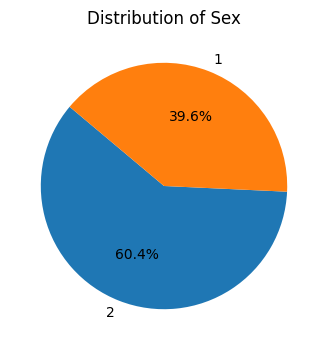

In [10]:
labels = df['SEX'].unique()
sizes = df['SEX'].value_counts()

# ploting pie chart

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')

# Displaying the plot

plt.show()

**In above pie chart we can see sex 2 has 60.4% share and sex 1 has 39.6% share**

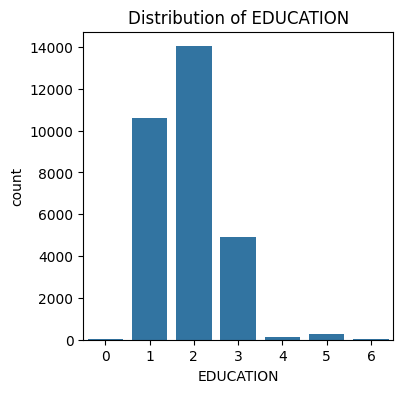

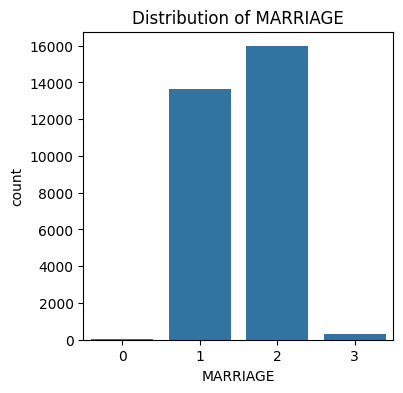

In [11]:
for i in ['EDUCATION','MARRIAGE']:
    labels = df[i].unique()
    sizes = df[i].value_counts()
    
    # ploting bar chart
    
    plt.figure(figsize=(4, 4))
    sns.barplot(sizes)
    plt.title(f'Distribution of {i}')

    # Displaying the plot

    plt.show()

**In first chart we can see that records for education 1, 2, 3 have large number of records than education 0, 4, 5, 6.**

**In seond chart we can see that records for marriage 1, 2 have large number of records than marriage 1, 3.**

### **Let's create cluster bar chart for defaulter and non defaulters by catergories**

<Figure size 500x500 with 0 Axes>

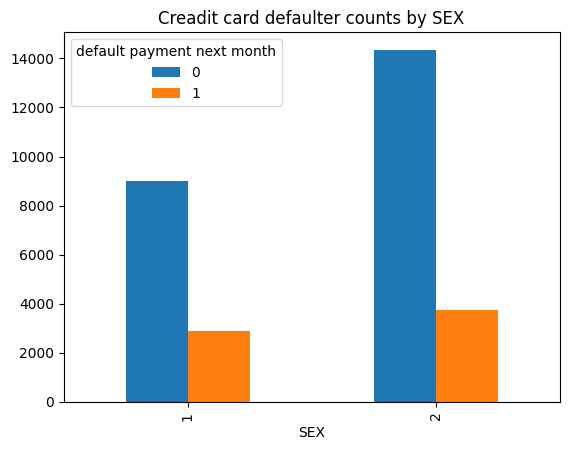

<Figure size 500x500 with 0 Axes>

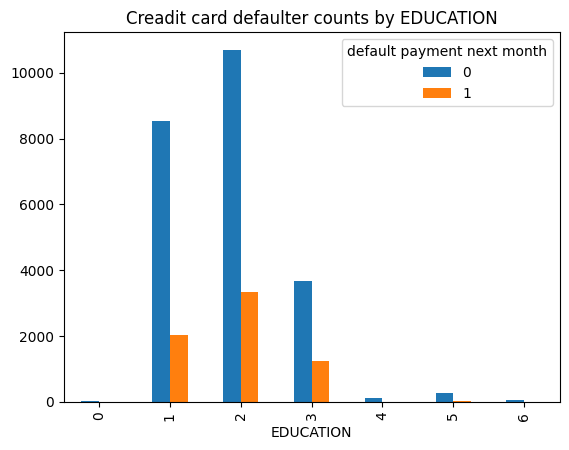

<Figure size 500x500 with 0 Axes>

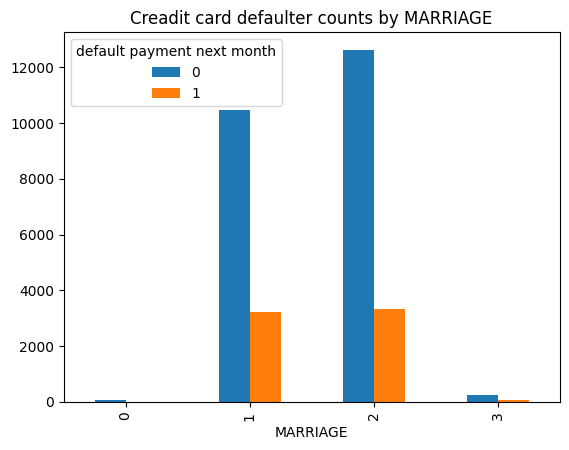

In [12]:
for i in ['SEX','EDUCATION','MARRIAGE']:

    # ploting cluster bar chart

    plt.figure(figsize=(5,5))
    data = df.groupby([i])['default payment next month'].value_counts().unstack()
    data.plot(kind="bar")
    plt.title(f'Creadit card defaulter counts by {i}')

    # display plot

    plt.show()

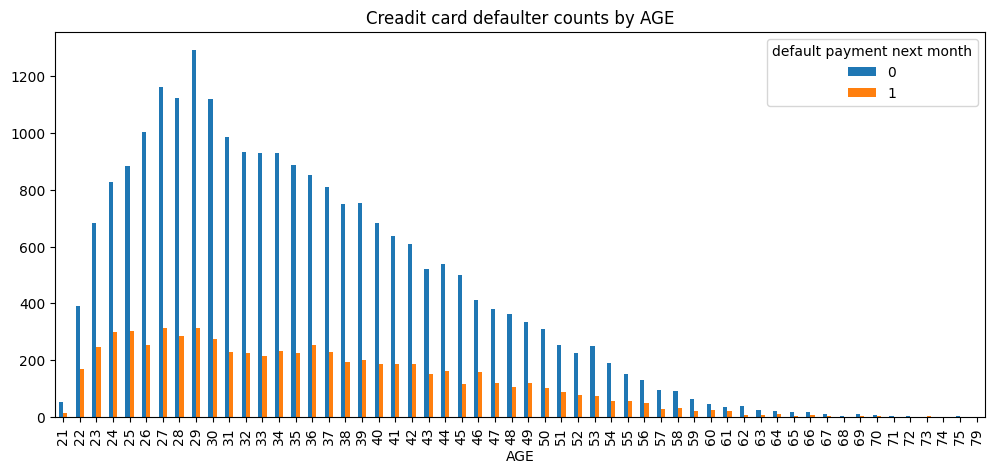

In [22]:
# ploting cluster bar chart

data = df.groupby(['AGE'])['default payment next month'].value_counts().unstack()
data.plot(kind="bar",figsize=(12,5))
plt.title(f'Creadit card defaulter counts by AGE')

# display plot

plt.show()

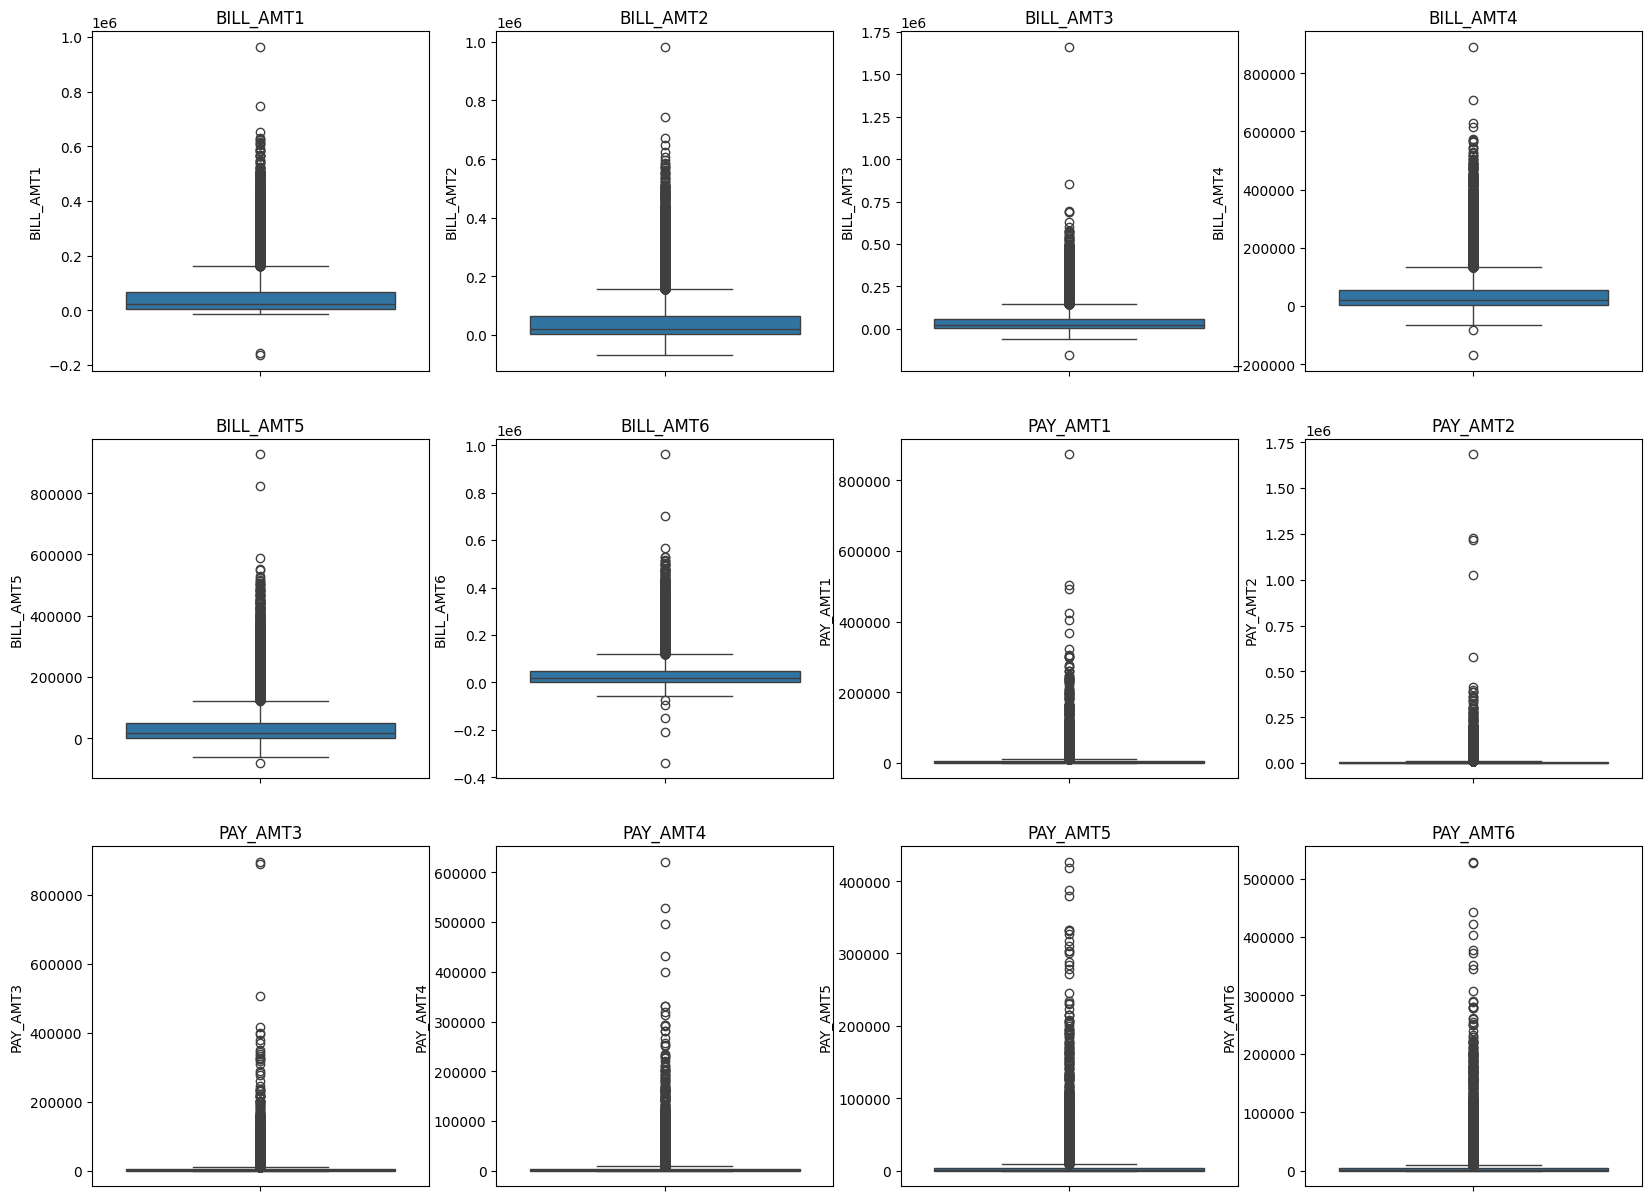

In [14]:
# box plot for identifying outliers

n = 1
plt.figure(figsize=(20,15))
for i in df.iloc[:,11:23]:
    plt.subplot(3,4,n)
    n=n+1
    sns.boxplot(df[i])
    plt.title(i)

**There are no outliers to worry about in our data**

**let's see relationship beetween AGE and BILLS and BIILS PAID**

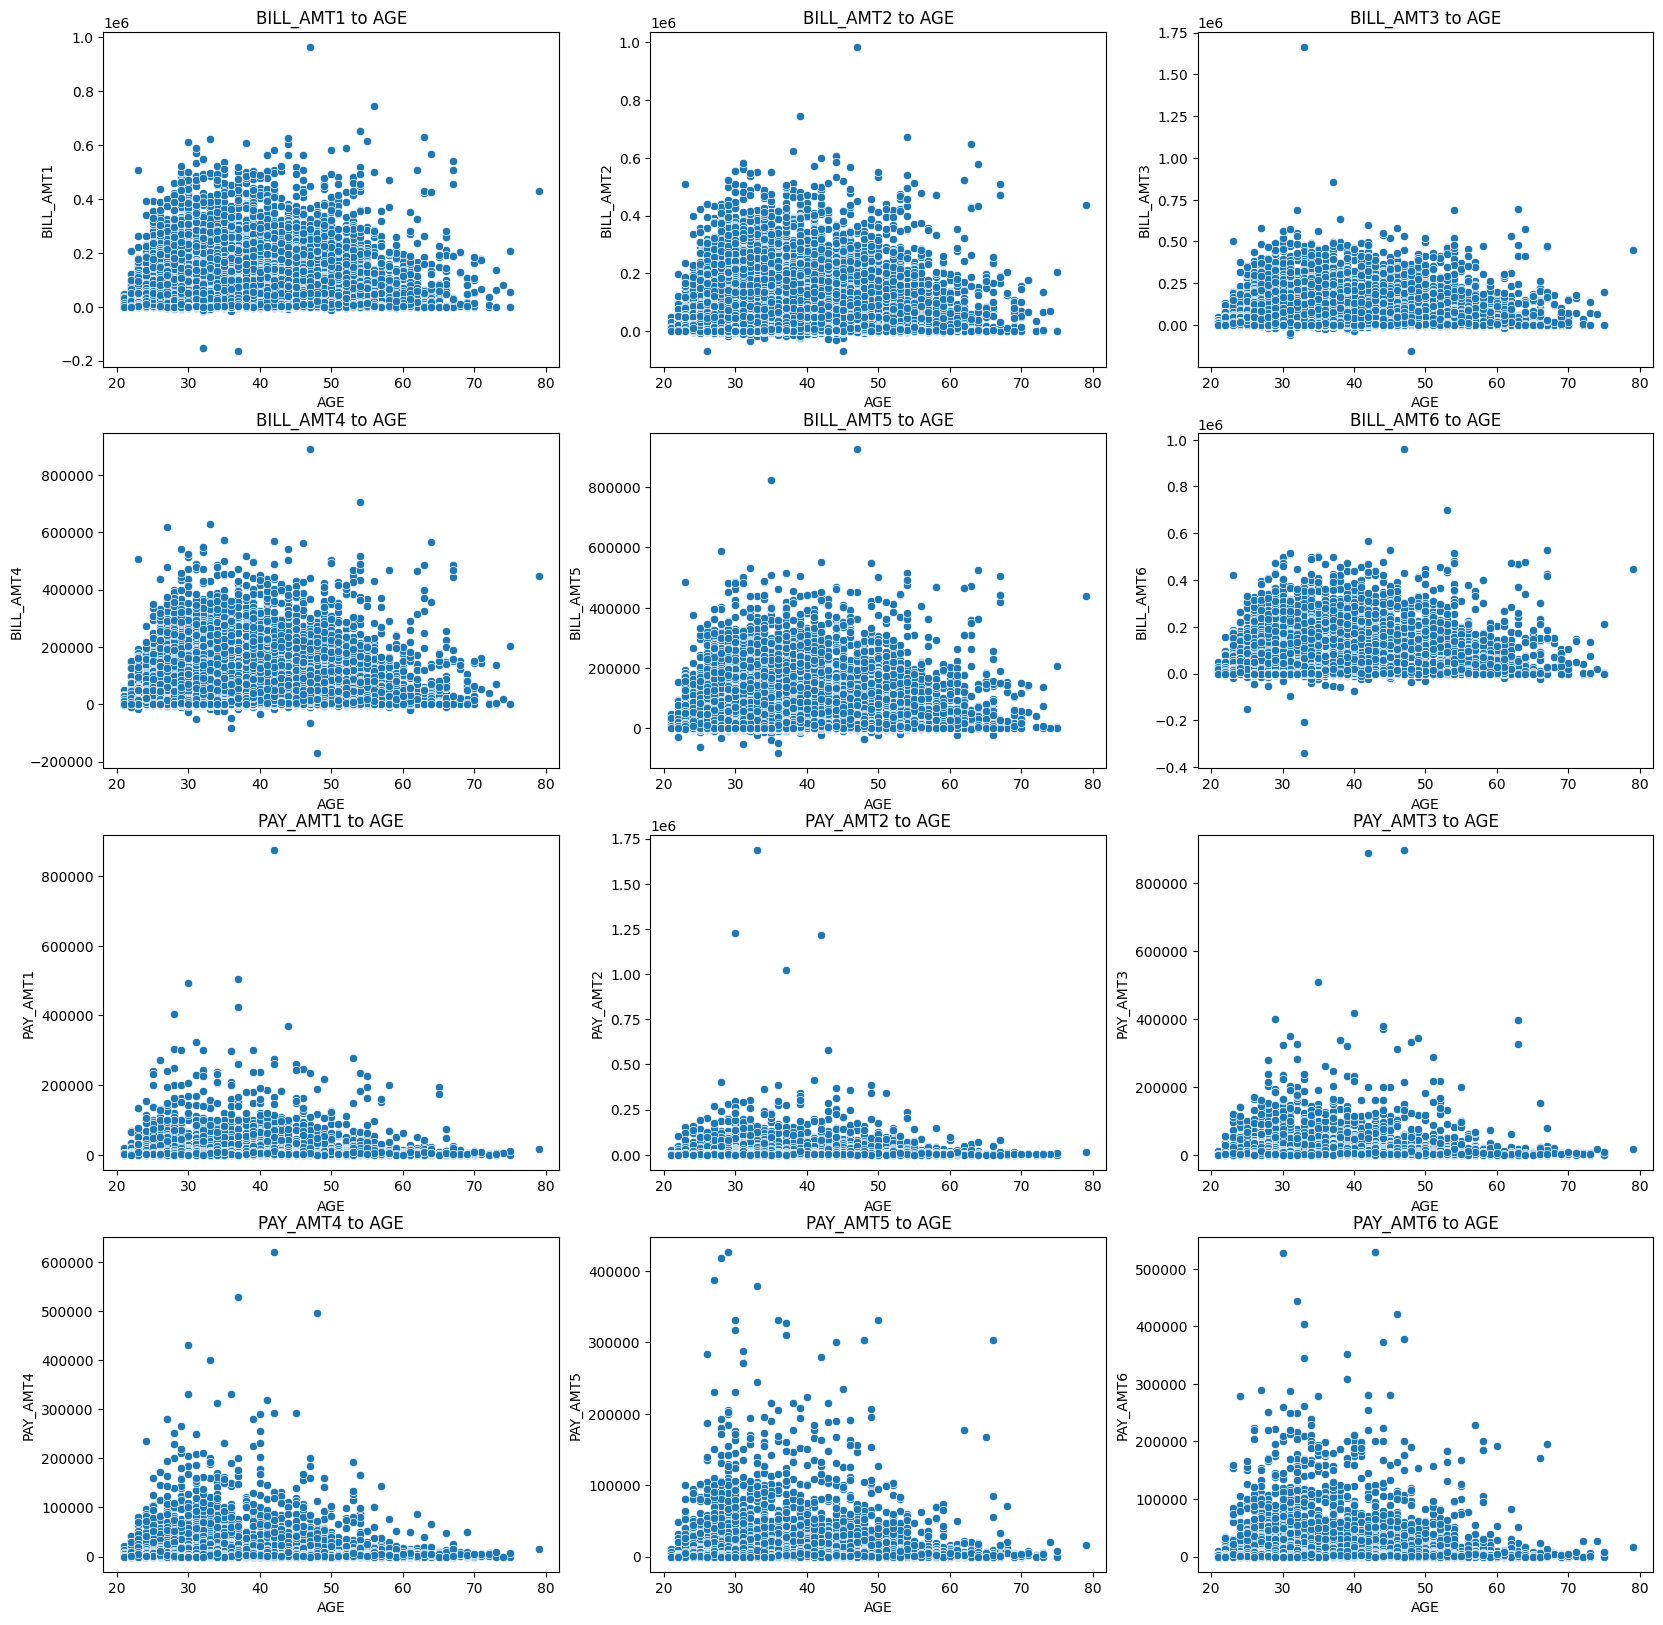

In [9]:
n = 1
plt.figure(figsize=(20,20))
for i in df.iloc[:,11:23]:
    plt.subplot(4,3,n)
    n=n+1
    
    #create scatter plot
    
    sns.scatterplot(df, y = i, x = 'AGE')
    plt.title(f'{i} to AGE')

**Lets see distribution of LIMIT BALANCE and AGE**

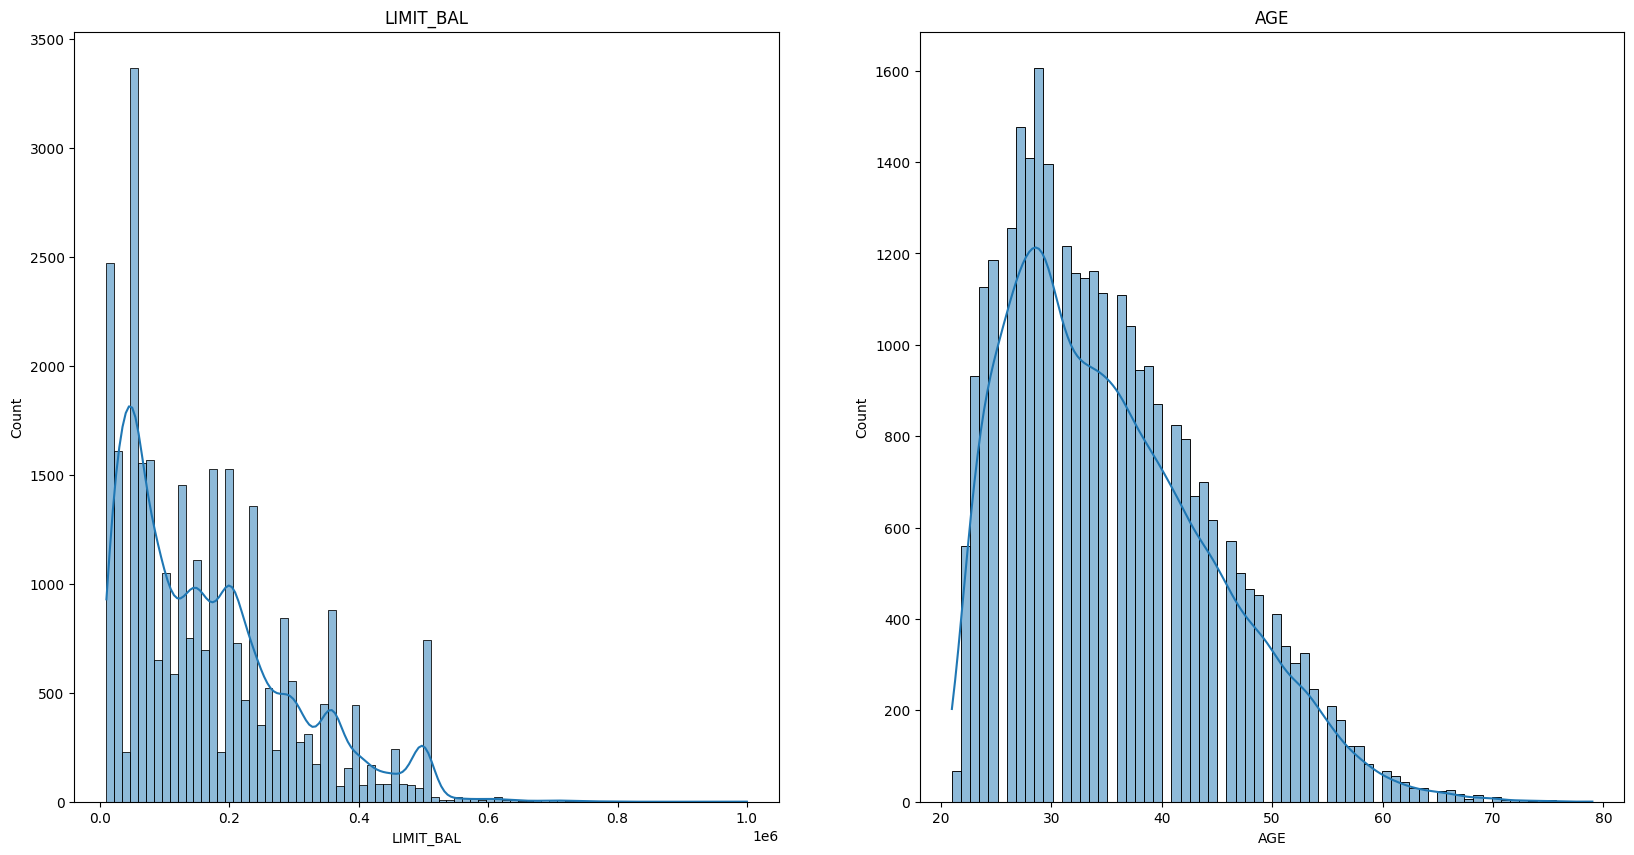

In [17]:
n = 1
plt.figure(figsize=(20,10))
for i in df[['LIMIT_BAL','AGE']]:
    plt.subplot(1,2,n)
    
    # create histogram
    
    sns.histplot(df[i], kde=True)
    plt.title(i)
    n=n+1

**Age vs Limit scatterplot by defaulters and no defaulters**

Text(0.5, 1.0, 'Age vs LIMIT')

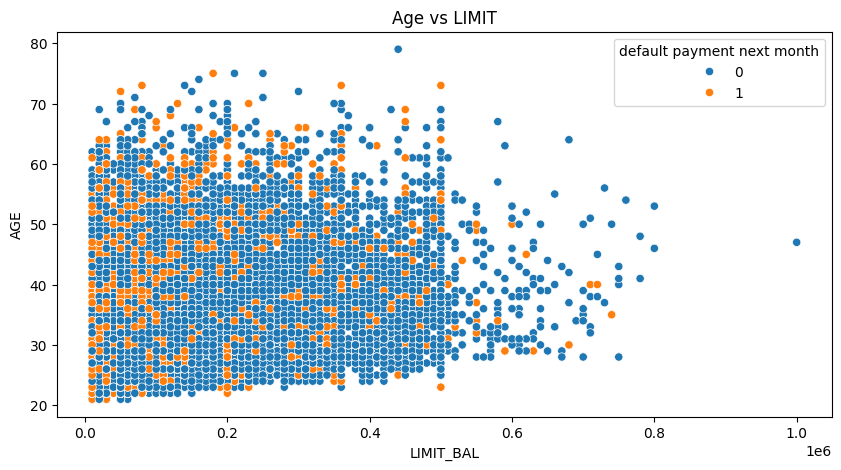

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, y = 'AGE', x = 'LIMIT_BAL', hue='default payment next month')
plt.title('Age vs LIMIT')

**Heatmap to se relationship between all columns**

<Axes: >

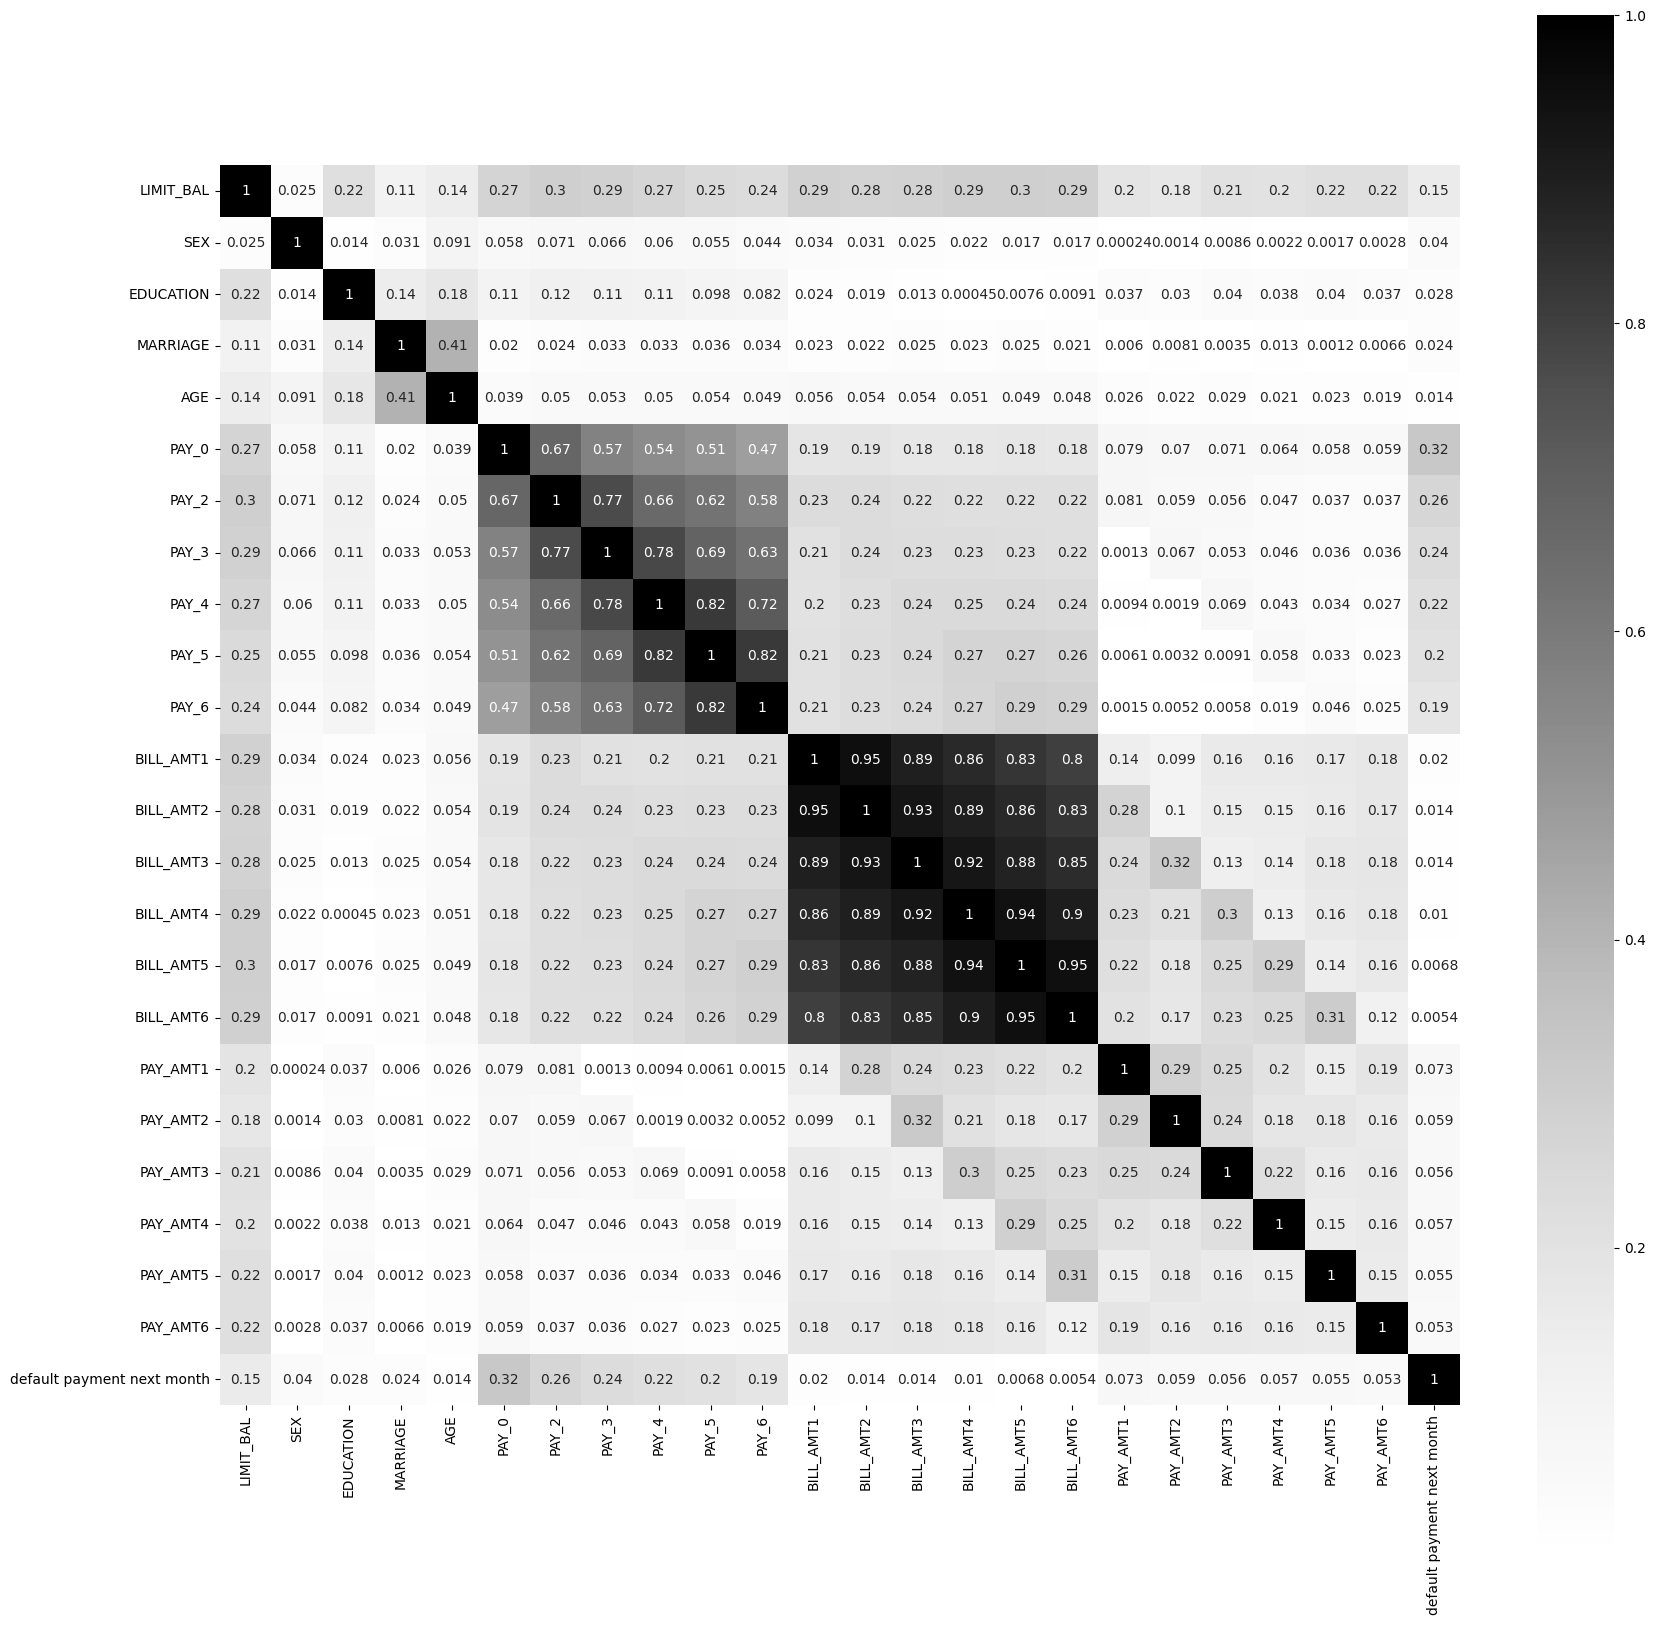

In [23]:
plt.figure(figsize=(20,20))

# Create correlation chart

sns.heatmap(abs(df.corr()),annot=True, cmap='Greys',square=True)

**From about it map chart we can see all the bill columns are related to each other and the payments made are also is related to each other we can add them together to make one column**

## **Feature engineering**

In [10]:
df['TOTAL BILL'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']

In [11]:
df['TOTAL PAYMENT'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

In [12]:
df['PERCENTAGE PAID'] = df.apply(lambda x: 0 if x['TOTAL PAYMENT'] == 0 or x['TOTAL BILL'] == 0 else (x['TOTAL PAYMENT'] * 100) /( x['TOTAL BILL']), axis=1)

In [13]:
df['TOTAL PAY'] = df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,TOTAL BILL,TOTAL PAYMENT,PERCENTAGE PAID,TOTAL PAY
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,7704,689,8.943406,-2
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,17077,5000,29.279147,3
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,101653,11018,10.838834,0
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,231334,8388,3.625926,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,109339,59049,54.005433,-2


**We have created four new features TOTAL BILL, TOTAL PAYMENT, PERCENTAGE PAID and TOTAL PAY**

**Let's drop the columns which we have added to form new colum**

In [15]:
df.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],inplace=True)

In [16]:
df.drop(columns=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],inplace=True)

In [17]:
df.drop(columns=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],inplace=True)

In [18]:
# let's see which all columns we have now

df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month', 'TOTAL BILL', 'TOTAL PAYMENT',
       'PERCENTAGE PAID', 'TOTAL PAY'],
      dtype='object')

In [19]:
# Rearange Columns

df = pd.concat([df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
        'TOTAL BILL', 'TOTAL PAYMENT'
       , 'TOTAL PAY','PERCENTAGE PAID']],df['default payment next month']],axis=1)

In [20]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TOTAL BILL,TOTAL PAYMENT,TOTAL PAY,PERCENTAGE PAID,default payment next month
0,20000,2,2,1,24,7704,689,-2,8.943406,1
1,120000,2,2,2,26,17077,5000,3,29.279147,1
2,90000,2,2,2,34,101653,11018,0,10.838834,0
3,50000,2,2,1,37,231334,8388,0,3.625926,0
4,50000,1,2,1,57,109339,59049,-2,54.005433,0
...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,725349,42550,0,5.866142,0
29996,150000,1,3,2,43,21182,14490,-4,68.407138,0
29997,30000,1,2,2,37,70496,31300,8,44.399682,1
29998,80000,1,3,1,41,266611,147181,-1,55.204399,1


### **let see the final heat map to see the correlation between our new columns and target column**

Text(0.5, 1.0, 'Heatmap')

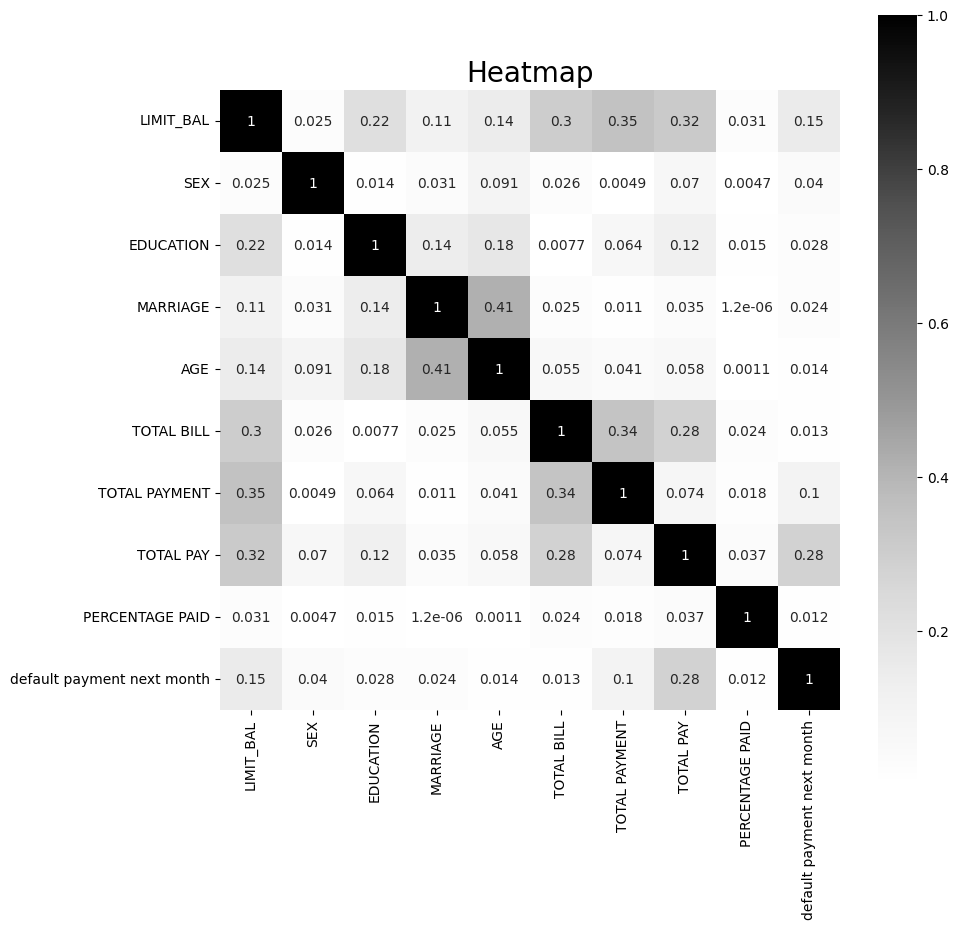

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

### **4. Data Wrangling**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   TOTAL BILL                  30000 non-null  int64  
 6   TOTAL PAYMENT               30000 non-null  int64  
 7   TOTAL PAY                   30000 non-null  int64  
 8   PERCENTAGE PAID             30000 non-null  float64
 9   default payment next month  30000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.3 MB


**we don't have any categorical data and we don't have anyone values in our data set**

### **Now our data set is ready for modelling**

### **5. Splitting the data and Standardization**

In [21]:
cred_df = df.copy()

In [22]:
X = cred_df.drop(columns='default payment next month')
y = cred_df['default payment next month']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

In [24]:
y_train.value_counts()

default payment next month
0    18691
1     5309
Name: count, dtype: int64

In [25]:
y_test.value_counts()

default payment next month
0    4673
1    1327
Name: count, dtype: int64

In [26]:
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(24000, 9), X_test=(6000, 9)
The shapes of train and test set for dependent variables are: y_train=(24000,), y_test=(6000,)


In [27]:
# before transformation 

X_train.values

array([[ 2.50000000e+05,  2.00000000e+00,  1.00000000e+00, ...,
         2.92680000e+04, -1.20000000e+01,  1.29452873e+02],
       [ 2.00000000e+05,  2.00000000e+00,  1.00000000e+00, ...,
         1.24150000e+04, -6.00000000e+00,  9.08658421e+01],
       [ 7.00000000e+04,  2.00000000e+00,  1.00000000e+00, ...,
         1.97000000e+04,  2.00000000e+00,  4.84510423e+00],
       ...,
       [ 6.00000000e+04,  1.00000000e+00,  2.00000000e+00, ...,
         5.07000000e+03,  1.00000000e+01,  1.24441608e+01],
       [ 5.00000000e+05,  2.00000000e+00,  1.00000000e+00, ...,
         4.82832000e+05, -4.00000000e+00,  4.22746973e+01],
       [ 2.00000000e+04,  1.00000000e+00,  2.00000000e+00, ...,
         6.15600000e+03,  0.00000000e+00,  5.66511756e+00]])

**We are going to use standardization to scale are data**

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
# after transformation

X_train

array([[ 0.63734793,  0.81529221, -1.08027258, ..., -0.03751895,
        -1.85209874,  0.1620252 ],
       [ 0.25156751,  0.81529221, -1.08027258, ..., -0.31362213,
        -0.83843042,  0.09611579],
       [-0.75146157,  0.81529221, -1.08027258, ..., -0.19427176,
         0.51312735, -0.0508138 ],
       ...,
       [-0.82861765, -1.22655409,  0.18486878, ..., -0.43395547,
         1.86468513, -0.03783406],
       [ 2.56625001,  0.81529221, -1.08027258, ...,  7.39323305,
        -0.50054097,  0.01311863],
       [-1.13724199, -1.22655409,  0.18486878, ..., -0.4161635 ,
         0.17523791, -0.04941315]])

### **6. Fitting models**

* **In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Decision Tree classification, Random Forest classification, XGBoost classification.**

* **The detailed step we will be following are as follows:**

1. **Initial fitting of the model.**

2. **Evaluating the performance of the model using metrics.**

3. **Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.**

**6.1 decision tree classifier**

In [86]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
# predicting for both train and test

y_pred_train1=dt_model.predict(X_train)
y_pred_test1=dt_model.predict(X_test)

In [88]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Desicion Tree:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - Desicion Tree:
The accuracy of training set =  0.9995416666666667
The precision of training set =  [0.99941183 1.        ]
The recall of training set =  [1.         0.99792805]
The f1 score of training set =  [0.99970583 0.99896295]
The confusion matrix of training set = 
 [[18691     0]
 [   11  5298]]


In [89]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Desicion Tree:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - Desicion Tree:
The accuracy of test set =  0.7213333333333334
The precision of test set =  [0.82415208 0.37417943]
The recall of test set =  [0.81639204 0.38658628]
The f1 score of test set =  [0.82025371 0.38028169]
The confusion matrix of test set = 
 [[3815  858]
 [ 814  513]]


**• the accuracy score for test data is 0.99% and for a train data is 0.71% so it's over fitting**

**• We need to do hyperparameter tunning to prevent overfitting**

**let's store Matric values of test and train result for letter comparison**

In [90]:
dict1={'Model':'Desicion Tree - Train, Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))]}

dict2={'Model':'Desicion Tree - Test, Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))]}

### **Cross-validation using GridSearch**

In [35]:
# Setting the parameters to tune

# Maximum depth of trees
max_depth = list(np.arange(10,30,2,dtype='int64'))

# HYperparameter Grid
param_dict = {"criterion":['gini'],
              'max_depth' : max_depth}

In [36]:
grid = GridSearchCV(dt_model,param_grid=param_dict,cv=10,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]},
             scoring='accuracy')

In [37]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [38]:
dt_model_tunned = grid.best_estimator_

In [39]:
grid.best_score_

0.7981666666666667

In [40]:
y_pred_train2=dt_model_tunned.predict(X_train)
y_pred_test2=dt_model_tunned.predict(X_test)

In [41]:
# finding each of the metrics for train set

print('The evaluation metric values for training set - Desicion Tree:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Desicion Tree:
The accuracy of training set =  0.84075
The precision of training set =  [0.85353559 0.75025244]
The recall of training set =  [0.96030175 0.41985308]
The f1 score of training set =  [0.90377644 0.5384058 ]
The confusion matrix of training set = 
 [[17949   742]
 [ 3080  2229]]


In [42]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Desicion Tree:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Desicion Tree:
The accuracy of test set =  0.7928333333333333
The precision of test set =  [0.823219   0.56051873]
The recall of test set =  [0.93473144 0.29314243]
The f1 score of test set =  [0.87543842 0.38495794]
The confusion matrix of test set = 
 [[4368  305]
 [ 938  389]]


**let's store Matric values of test and train result for letter comparison**

In [43]:
dict3={'Model':'Desicion Tree - Train, After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))]}

dict4={'Model':'Desicion Tree - Test, After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))]}

**6.2 random forest classifier**

In [44]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [45]:
# predicting for both train and test

y_pred_train1=rf_model.predict(X_train)
y_pred_test1=rf_model.predict(X_test)

In [46]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.9995416666666667
The precision of training set =  [0.99951867 0.99962278]
The recall of training set =  [0.999893   0.99830477]
The f1 score of training set =  [0.9997058  0.99896334]
The confusion matrix of training set = 
 [[18689     2]
 [    9  5300]]


In [47]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.7966666666666666
The precision of test set =  [0.82569327 0.57653791]
The recall of test set =  [0.93665739 0.30369254]
The f1 score of test set =  [0.87768197 0.39782823]
The confusion matrix of test set = 
 [[4377  296]
 [ 924  403]]


**• From evaluation metrics result we can conclude our model is overfitting**

**• We need to do hyperparameter tunning to prevent overfitting**

**let's store Matric values of test and train result for letter comparison**

In [48]:
dict5={'Model':'Random Forest - Train, Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))]}

dict6={'Model':'Random Forest - Test, Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))]}

**Cross-validation using RandomizedSearch**

In [49]:
# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

In [50]:
rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv = 10,scoring='accuracy',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [12, 14, 16, 18, 20, 22,
                                                      24, 26, 28],
                                        'n_estimators': [80, 100, 120, 140, 160,
                                                         180]},
                   random_state=0, scoring='accuracy')

In [62]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=120, random_state=0)

In [63]:
rf_model_tunned = rf_random.best_estimator_

In [64]:
rf_random.best_score_

0.8077916666666665

In [65]:
y_pred_train2=rf_model_tunned.predict(X_train)
y_pred_test2=rf_model_tunned.predict(X_test)

In [66]:
# finding each of the metrics for train set
print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.8681666666666666
The precision of training set =  [0.86680841 0.87830688]
The recall of training set =  [0.98154192 0.46901488]
The f1 score of training set =  [0.92061421 0.61149312]
The confusion matrix of training set = 
 [[18346   345]
 [ 2819  2490]]


In [67]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.8043333333333333
The precision of test set =  [0.82524633 0.62318841]
The recall of test set =  [0.9499251  0.29163527]
The f1 score of test set =  [0.88320732 0.3973306 ]
The confusion matrix of test set = 
 [[4439  234]
 [ 940  387]]


**let's store evaluation metric result for letter comparison**

In [68]:
dict7={'Model':'Random Forest - Train, After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))]}

dict8={'Model':'Random Forest - test, After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))]}

**6.3 XGBRF classification**

In [93]:
xgb_model=XGBClassifier(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [94]:
# predicting for both train and test

y_pred_train1=xgb_model.predict(X_train)
y_pred_test1=xgb_model.predict(X_test)

In [95]:
# finding each of the metrics for train set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.8649583333333334
The precision of training set =  [0.868524  0.8403555]
The recall of training set =  [0.97405168 0.48088152]
The f1 score of training set =  [0.91826596 0.61171678]
The confusion matrix of training set = 
 [[18206   485]
 [ 2756  2553]]


In [96]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.7978333333333333
The precision of test set =  [0.82445611 0.58532934]
The recall of test set =  [0.9407233  0.29464959]
The f1 score of test set =  [0.87876062 0.39197995]
The confusion matrix of test set = 
 [[4396  277]
 [ 936  391]]


**From above observations we can see our model is not over fitting but we can still try to tune Hyper parameters**

**let's store evaluation metric result for letter comparison**

In [97]:
dict9={'Model':'XGBoost - Train, Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))]}

dict10={'Model':'XGBoost - Test, Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))]}

**Cross-validation using RandomizedSearch**

In [98]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'gamma':gamma,
               'learning_rate':learning_rate}

In [99]:
# Random search

xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  2],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                                                          0.13, 0.14],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [5, 7, 9, 11, 13]},
                   random_state=0, scoring='accuracy')

In [100]:
xgb_random.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12000000000000001,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [101]:
xgb_random.best_score_

0.8033333333333335

In [102]:
xgb_random.best_params_

{'n_estimators': 13,
 'max_depth': 11,
 'learning_rate': 0.12000000000000001,
 'gamma': 0}

In [103]:
xgb_random_tunned = xgb_random.best_estimator_

In [104]:
y_pred_train2=xgb_random_tunned.predict(X_train)
y_pred_test2=xgb_random_tunned.predict(X_test)

In [105]:
# finding each of the metrics for train set
print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.8572916666666667
The precision of training set =  [0.85266125 0.89983022]
The recall of training set =  [0.9873736  0.39932191]
The f1 score of training set =  [0.91508615 0.55316373]
The confusion matrix of training set = 
 [[18455   236]
 [ 3189  2120]]


In [106]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.7998333333333333
The precision of test set =  [0.81426503 0.63235294]
The recall of test set =  [0.96255082 0.22682743]
The f1 score of test set =  [0.88222026 0.33388796]
The confusion matrix of test set = 
 [[4498  175]
 [1026  301]]


**let's store evaluation metric result for letter comparison**

In [107]:
dict11={'Model':'XGBoost - Train, After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))]}

dict12={'Model':'XGBoost - Test, After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))]}

### **Let's check training and test set values that has been obtained from our models.**

In [108]:
data = pd.DataFrame([dict1,dict2,dict3,dict4,dict5,dict6,dict7,dict8,dict9,dict10,dict11,dict12])

In [109]:
data

,Model,Accuracy,Precision,Recall,F1_score
0,"Desicion Tree - Train, Before hyperparameter t...",1.00,"[[1.0, 1.0]]","[[1.0, 1.0]]","[[1.0, 1.0]]"
1,"Desicion Tree - Test, Before hyperparameter tu...",0.72,"[[0.82, 0.37]]","[[0.82, 0.39]]","[[0.82, 0.38]]"
2,"Desicion Tree - Train, After hyperparameter tu...",0.84,"[[0.85, 0.75]]","[[0.96, 0.42]]","[[0.9, 0.54]]"
3,"Desicion Tree - Test, After hyperparameter tuning",0.79,"[[0.82, 0.56]]","[[0.93, 0.29]]","[[0.88, 0.38]]"
4,"Random Forest - Train, Before hyperparameter t...",1.00,"[[1.0, 1.0]]","[[1.0, 1.0]]","[[1.0, 1.0]]"
5,"Random Forest - Test, Before hyperparameter tu...",0.80,"[[0.83, 0.58]]","[[0.94, 0.3]]","[[0.88, 0.4]]"
6,"Random Forest - Train, After hyperparameter tu...",0.87,"[[0.87, 0.88]]","[[0.98, 0.47]]","[[0.92, 0.61]]"
7,"Random Forest - test, After hyperparameter tuning",0.80,"[[0.83, 0.62]]","[[0.95, 0.29]]","[[0.88, 0.4]]"
8,"XGBoost - Train, Before hyperparameter tuning",0.86,"[[0.87, 0.84]]","[[0.97, 0.48]]","[[0.92, 0.61]]"
9,"XGBoost - Test, Before hyperparameter tuning",0.80,"[[0.82, 0.59]]","[[0.94, 0.29]]","[[0.88, 0.39]]"


In [110]:
train_results = pd.DataFrame([])
test_results = pd.DataFrame([])

data1 = data.transpose()

for i in data1.columns:
    if i%2 == 1:
        test_results = pd.concat([test_results,data.transpose()[i]],axis=1)
    elif i%2 == 0:
        train_results = pd.concat([train_results,data.transpose()[i]],axis=1)

### Test results

In [111]:
train_results.transpose()

,Model,Accuracy,Precision,Recall,F1_score
0,"Desicion Tree - Train, Before hyperparameter t...",1.0,"[[1.0, 1.0]]","[[1.0, 1.0]]","[[1.0, 1.0]]"
2,"Desicion Tree - Train, After hyperparameter tu...",0.84,"[[0.85, 0.75]]","[[0.96, 0.42]]","[[0.9, 0.54]]"
4,"Random Forest - Train, Before hyperparameter t...",1.0,"[[1.0, 1.0]]","[[1.0, 1.0]]","[[1.0, 1.0]]"
6,"Random Forest - Train, After hyperparameter tu...",0.87,"[[0.87, 0.88]]","[[0.98, 0.47]]","[[0.92, 0.61]]"
8,"XGBoost - Train, Before hyperparameter tuning",0.86,"[[0.87, 0.84]]","[[0.97, 0.48]]","[[0.92, 0.61]]"
10,"XGBoost - Train, After hyperparameter tuning",0.86,"[[0.85, 0.9]]","[[0.99, 0.4]]","[[0.92, 0.55]]"


### Train results

In [112]:
test_results.transpose()

,Model,Accuracy,Precision,Recall,F1_score
1,"Desicion Tree - Test, Before hyperparameter tu...",0.72,"[[0.82, 0.37]]","[[0.82, 0.39]]","[[0.82, 0.38]]"
3,"Desicion Tree - Test, After hyperparameter tuning",0.79,"[[0.82, 0.56]]","[[0.93, 0.29]]","[[0.88, 0.38]]"
5,"Random Forest - Test, Before hyperparameter tu...",0.8,"[[0.83, 0.58]]","[[0.94, 0.3]]","[[0.88, 0.4]]"
7,"Random Forest - test, After hyperparameter tuning",0.8,"[[0.83, 0.62]]","[[0.95, 0.29]]","[[0.88, 0.4]]"
9,"XGBoost - Test, Before hyperparameter tuning",0.8,"[[0.82, 0.59]]","[[0.94, 0.29]]","[[0.88, 0.39]]"
11,"XGBoost - Test, After hyperparameter tuning",0.8,"[[0.81, 0.63]]","[[0.96, 0.23]]","[[0.88, 0.33]]"


**After having experimented two machine learning algorithms namely; Decision Tree, Random forest and Xgboost, we can say that the best performance is given by XGBoost model with accuracies of 0.86 and 0.80 for training and test set respectively using RandomSearch.** 

**The best hyperparameter values are:**

1. **n_estimators: 13**

2. **max_depth: 11**

3. **learning_rate': 0.12**

4. **gamma: 0**

### **8. Conclusion**

### We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for credit card defaulters. We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.
--------------------------------------------------------------------------------
### Finally we implemented 3 machine learning algorithms namely; DecisionTree, RandomForest and XGBoost. We tried hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our **XGBoost model**.
--------------------------------------------------------------------------------
### The accuracy of our best model was 0.86 and 0.80 for training and test set respectively. Performance can be improved even further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will always be a need to check on the model from time to time. I hope this exercise will help you to take a step forward!